In [2]:
from astropy.io import fits

# Open a FITS file
hdulist = fits.open("D:\\work images\\vertopal.com_rxj1131.fits")

# Access the data in the primary HDU (Header Data Unit)
data = hdulist[0].data
hdulist.close()  # Close the FITS file

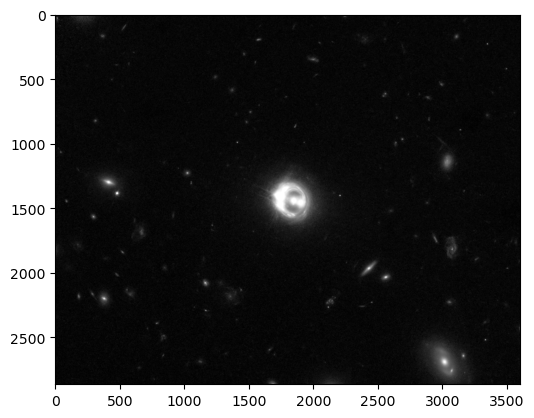

In [3]:
import matplotlib.pyplot as plt

# Assuming 'data' has shape (3, 3600, 3600)
# Display the first plane (index 0)
plt.imshow(data[0], cmap='gray')
plt.show()

In [4]:
from astropy.io import fits

# Open a FITS file
hdulist = fits.open('D:\\work images\\vertopal.com_rxj1131.fits')

# Access the header information from the primary HDU
header = hdulist[0].header

# Print the header information
print(header)

# Close the FITS file
hdulist.close()

SIMPLE  =                    T                                                  BITPIX  =                    8                                                  NAXIS   =                    3                                                  NAXIS1  =                 3600                                                  NAXIS2  =                 2865                                                  NAXIS3  =                    3                                                  BSCALE  =         1.000000E+00                                                  BZERO   =         0.000000E+00                                                  DATAMAX =         2.550000E+02                                                  DATAMIN =         0.000000E+00                                                  HISTORY https://imagemagick.org                                                 END                                                                                                                     

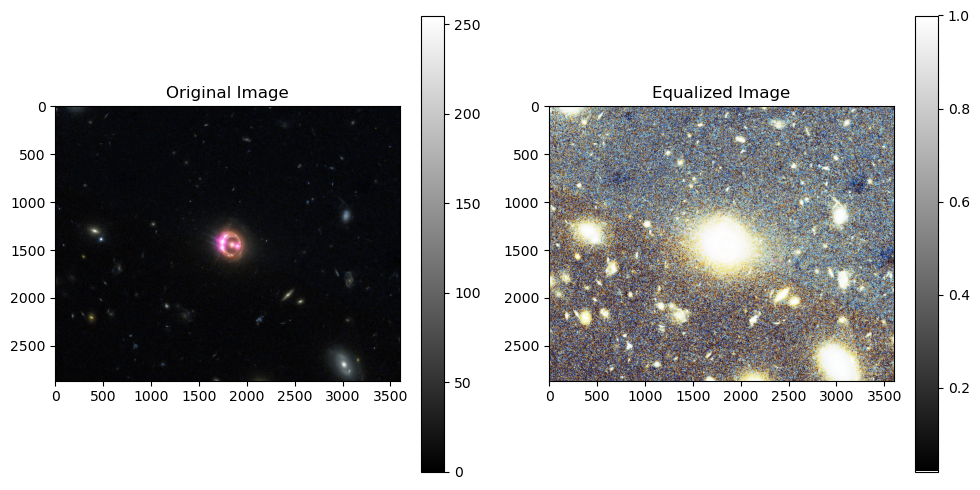

In [5]:
#Applying Equalizer
from astropy.io import fits
import matplotlib.pyplot as plt
from skimage import exposure
import numpy as np

# Open a FITS file
hdulist = fits.open('D:\\work images\\vertopal.com_rxj1131.fits')

# Access the data in the primary HDU (Header Data Unit)
data = hdulist[0].data
header = hdulist[0].header

# Close the FITS file
hdulist.close()

# Equalize each channel separately
equalized_channels = [exposure.equalize_hist(channel) for channel in data]

# Combine the equalized channels
data_equalized = np.stack(equalized_channels, axis=0)

# Display the equalized image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(data.transpose(1, 2, 0), cmap='gray')  # Display original data (assuming RGB)
plt.title('Original Image')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(data_equalized.transpose(1, 2, 0), cmap='gray')  # Display equalized data (assuming RGB)
plt.title('Equalized Image')
plt.colorbar()

plt.tight_layout()
plt.show()

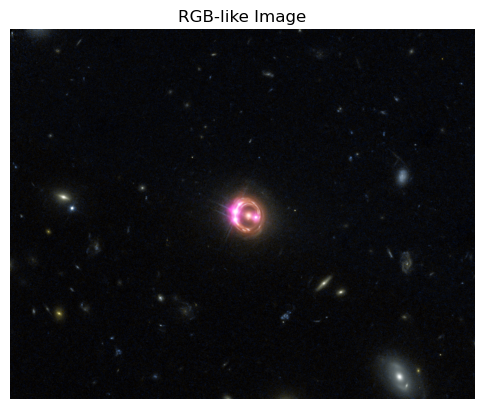

In [6]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

# Open and load the FITS image
hdulist = fits.open('D:\\work images\\vertopal.com_rxj1131.fits')

# Access the data from the primary HDU
data = hdulist[0].data

# Close the FITS file
hdulist.close()

# Normalize data to the [0, 1] range for visualization
data_normalized = (data - data.min()) / (data.max() - data.min())

# Transpose the data to rearrange dimensions for RGB display
data_rgb = np.transpose(data_normalized, axes=(1, 2, 0))

# Display the RGB-like image
plt.imshow(data_rgb)
plt.title('RGB-like Image')
plt.axis('off')
plt.show()


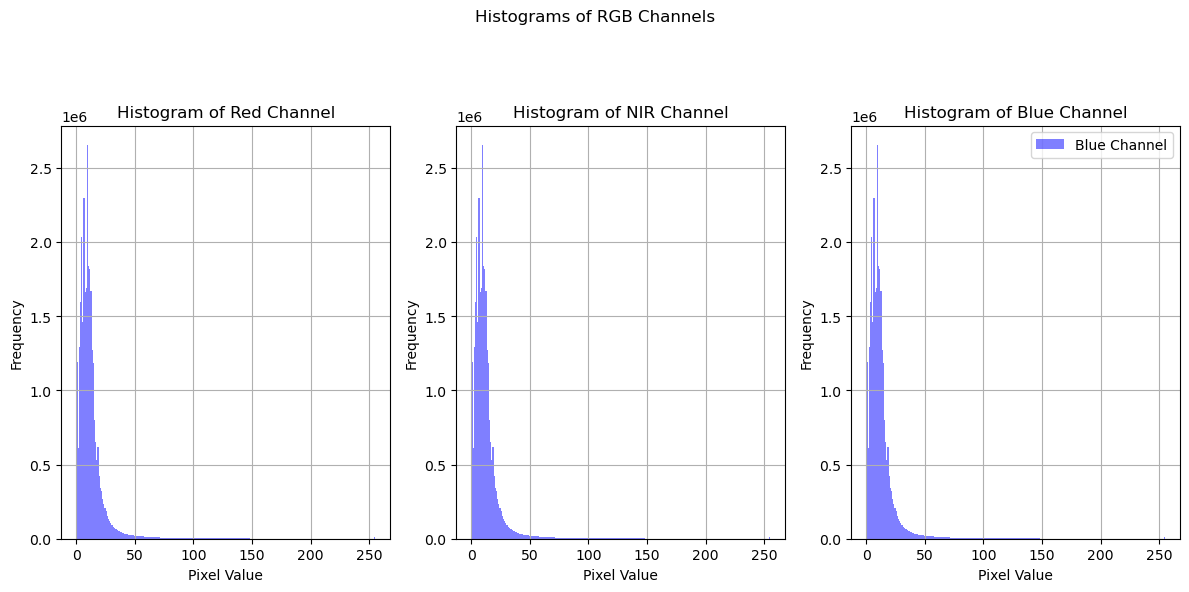

In [8]:
#Histogram
from astropy.io import fits
import matplotlib.pyplot as plt

# Function to create and display histograms
def plot_histogram(data, label, title):
    plt.hist(data.ravel(), bins=256, color='blue', alpha=0.5, label=label)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title(title)  # Add a title to the histogram
    plt.grid(True)

# Open and load the FITS images for red, green, and blue channels
hdulist_red = fits.open('D:\\work images\\vertopal.com_rxj1131.fits')
hdulist_nir = fits.open('D:\\work images\\vertopal.com_rxj1131.fits')
hdulist_blue = fits.open('D:\\work images\\vertopal.com_rxj1131.fits')

# Load the data from the primary HDU for each channel
data_red = hdulist_red[0].data
data_nir = hdulist_nir[0].data
data_blue = hdulist_blue[0].data


# Create histograms for each channel
plt.figure(figsize=(12, 6))
plt.subplot(131)
plot_histogram(data_red, 'Red Channel', 'Histogram of Red Channel')
plt.subplot(132)
plot_histogram(data_nir,  'NIR Channel', 'Histogram of NIR Channel')
plt.subplot(133)
plot_histogram(data_blue, 'Blue Channel', 'Histogram of Blue Channel')

plt.suptitle('Histograms of RGB Channels', fontsize=12)
plt.legend()
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

In [9]:
#Statistical Data
import numpy as np
from astropy.io import fits

# Function to compute and display statistics
def compute_statistics(data, channel_name):
    mean_value = np.mean(data)
    median_value = np.median(data)
    
    # Remove negative values and convert the data to integers by rounding to the nearest integer
    mode_data = np.round(data).astype(int)
    mode_data = mode_data[mode_data >= 0]  # Remove negative values
    
    if mode_data.size > 0:
        mode_value = float(np.argmax(np.bincount(mode_data.ravel())))
    else:
        mode_value = None
    
    std_deviation = np.std(data)  # Calculate standard deviation
    
    print(f"Statistics for {channel_name} Channel:")
    print(f"Mean: {mean_value:.2f}")
    print(f"Median: {median_value:.2f}")
    print(f"Mode: {mode_value}\n")
    print(f"Standard Deviation: {std_deviation:.2f}\n")


# Open and load the FITS images for red, green, and blue channels
hdulist_red = fits.open('D:\\work images\\vertopal.com_rxj1131.fits')
hdulist_green = fits.open('D:\\work images\\vertopal.com_rxj1131.fits')
hdulist_blue = fits.open('D:\\work images\\vertopal.com_rxj1131.fits')

# Load the data from the primary HDU for each channel
data_red = hdulist_red[0].data
data_nir = hdulist_green[0].data
data_blue = hdulist_blue[0].data

# Close the FITS files
hdulist_red.close()
hdulist_green.close()
hdulist_blue.close()

# Compute and display statistics for each channel
compute_statistics(data_red, 'Red')
compute_statistics(data_nir, 'NIR')
compute_statistics(data_blue, 'Blue')

Statistics for Red Channel:
Mean: 12.21
Median: 9.00
Mode: 9.0

Standard Deviation: 16.82

Statistics for NIR Channel:
Mean: 12.21
Median: 9.00
Mode: 9.0

Standard Deviation: 16.82

Statistics for Blue Channel:
Mean: 12.21
Median: 9.00
Mode: 9.0

Standard Deviation: 16.82

